# Matplotlib

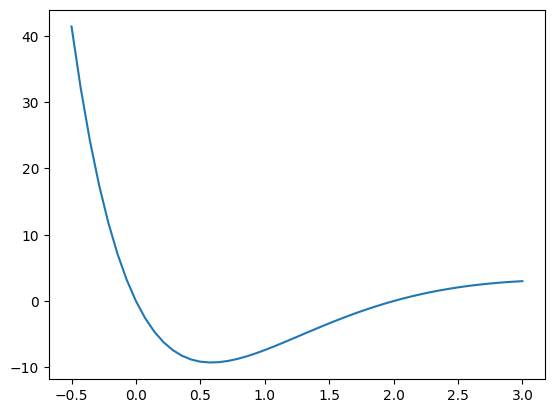

In [1]:
# Matplotlib is a powerful plotting library
# pyplot: state-based interface
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * (x - 2) * np.exp(3 - x)

x = np.linspace(-0.5, 3.0) # 50 values between -0.5 and 3.0
y = f(x)
plt.plot(x, y)
# plt.show() # if not working with an ipython console

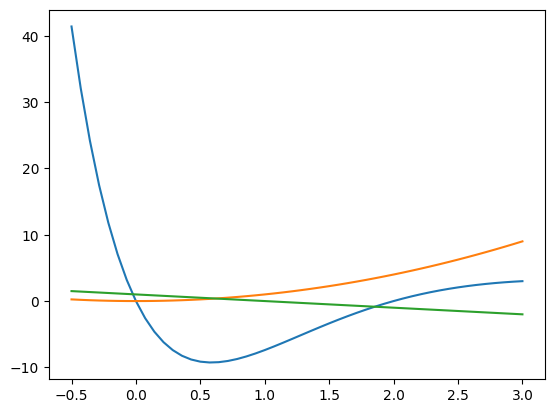

In [2]:
# Manually instantiate a Figure object prior to calling the plot routine
fig = plt.figure()
lines = plt.plot(x, f(x), x, x**2, x, 1 - x)

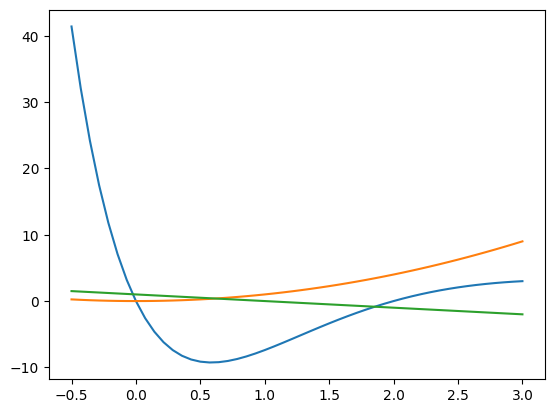

In [3]:
# Create a new 'figure' and explicitly create a set of 'axes' in this figure
fig, ax = plt.subplots()
l1 = ax.plot(x, f(x))
l1 = ax.plot(x, x**2)
l1 = ax.plot(x, 1 - x)

### Changing the style

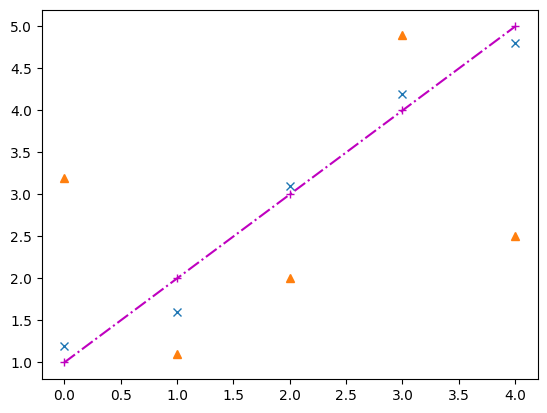

In [4]:
y1 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y2 = np.array([1.2, 1.6, 3.1, 4.2, 4.8])
y3 = np.array([3.2, 1.1, 2.0, 4.9, 2.5])
fig, ax = plt.subplots()
# Use a format string
lines = ax.plot(y1, '+-.m', y2, 'x', y3, '^')  # '+' marker, '-.' dash-dot line, 'm' magenta

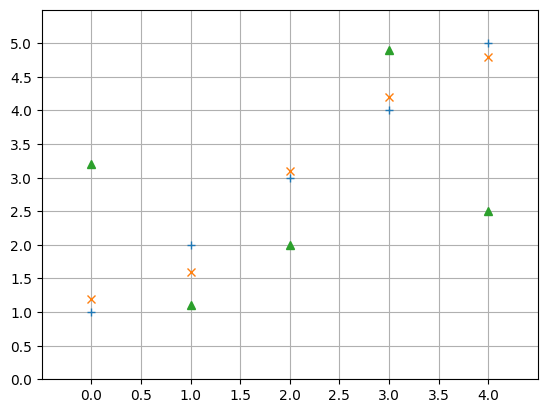

In [5]:
fig, ax = plt.subplots()
ax.axis([-0.5, 4.5, 0, 5.5]) # set axes
ax.set_xticks([0.5*i for i in range(9)]) # set xticks
ax.set_yticks([0.5*i for i in range(11)]) # set yticks
ax.grid()
lines = ax.plot(y1, '+', y2, 'x', y3, '^')

### Adding labels and legends

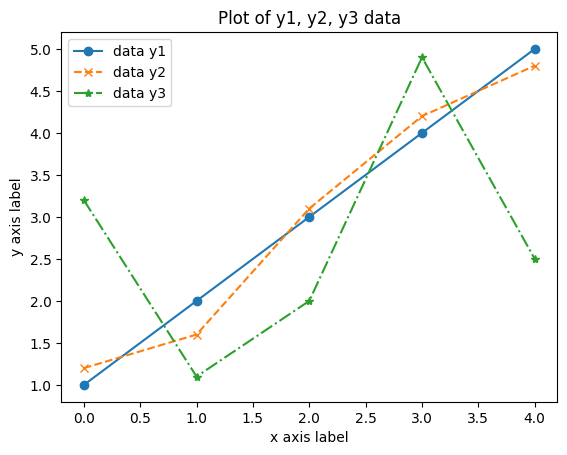

In [6]:
fig, ax = plt.subplots()
lines = ax.plot(y1, "o-", y2, "x--", y3, "*-.")
ax.set_title("Plot of y1, y2, y3 data")
ax.set_xlabel("x axis label")
ax.set_ylabel("y axis label")
ax.legend(("data y1", "data y2", "data y3"))

### Adding subplots

iterates: [2.0, 1.25, 1.025, 1.0003048780487804, 1.0000000464611474, 1.000000000000001, 1.0]
errors: [1.0, 0.25, 0.02499999999999991, 0.00030487804878043256, 4.6461147373833e-08, 1.1102230246251565e-15, 0.0]


Text(0, 0.5, 'Error')

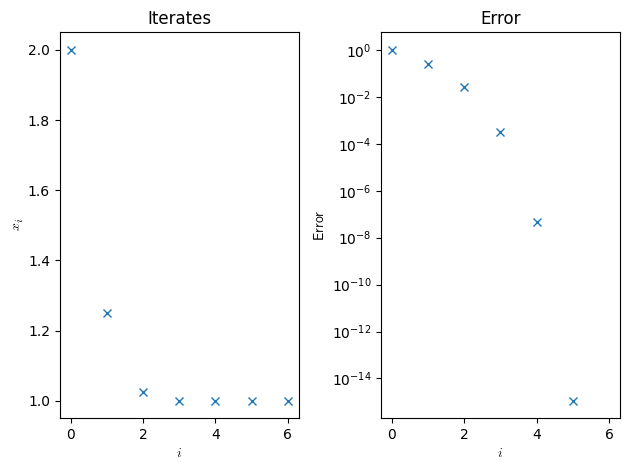

In [7]:
# Newton's method (Newton-Rapshon) for f(x) = x^2 - 1
def generate_newton_iters(x0, number):
    iterates = [x0]
    errors = [abs(x0 - 1.)]
    for _ in range(number):
        x0 = x0 - (x0*x0 - 1.)/(2*x0)
        iterates.append(x0)
        errors.append(abs(x0 - 1.))
    return iterates, errors

iterates, errors = generate_newton_iters(2.0, 6)
print('iterates:', iterates)
print('errors:', errors)
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)  # 1 row, 2 columns

# axe 1
ax1.plot(iterates, 'x')
ax1.set_title('Iterates')
ax1.set_xlabel('$i$', usetex=True)
ax1.set_ylabel('$x_i$', usetex=True)

# axe 2
ax2.semilogy(errors, 'x')
ax2.set_title('Error')
ax2.set_xlabel('$i$', usetex=True)
ax2.set_ylabel('Error', usetex=True)

### Saving figures

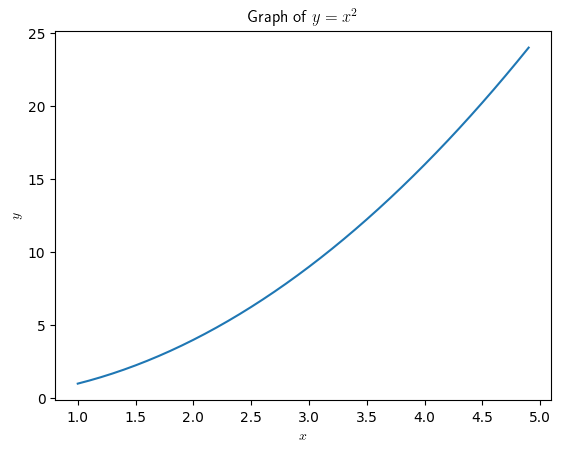

In [91]:
# Data
x = np.arange(1, 5, 0.1)
y = x*x
# Create a figure, add labels...
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Graph of $y = x^2$', usetex=True)
ax.set_xlabel('$x$', usetex=True)
ax.set_ylabel('$y$', usetex=True)
# Save file
fig.savefig('x2_fig.png', dpi=300)

###  3D plots (surface and countour)

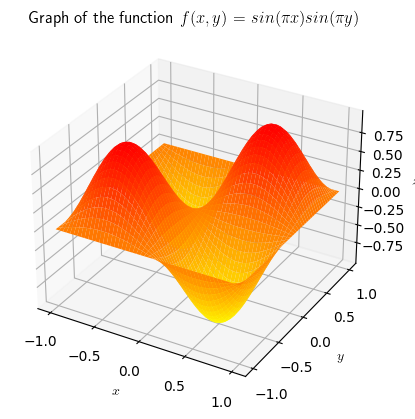

In [109]:
# Plot f(x, y) = sin(pi*x) * sin(pi*y)
X = np.linspace(-1, 1)
Y = np.linspace(-1, 1)
# Create a grid for the z values
x, y = np.meshgrid(X, Y)
z = np.sin(np.pi*x)*np.sin(np.pi*y)
# Create a figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # declare 3d plot
ax.plot_surface(x, y, z, cmap='autumn_r')
ax.set_xlabel('$x$', usetex=True)
ax.set_ylabel('$y$', usetex=True)
ax.set_zlabel('$z$', usetex=True)
ax.set_title(r'Graph of the function $f(x, y)$ = $sin(\pi x) sin(\pi y)$', usetex=True)
fig.savefig('3d-fig.png', dpi=400)

Text(0, 0.5, '$y$')

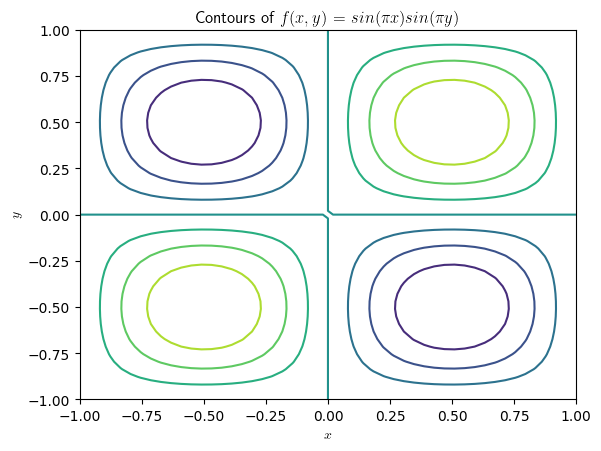

In [102]:
# Contour plot
fig = plt.figure()
plt.contour(x, y, z)
plt.title(r'Contours of $f(x, y)$ = $sin(\pi x) sin(\pi y)$', usetex=True)
plt.xlabel('$x$', usetex=True)
plt.ylabel('$y$', usetex=True)

### Plot Triangulation

Text(0.5, 1.0, 'Aproximate contours')

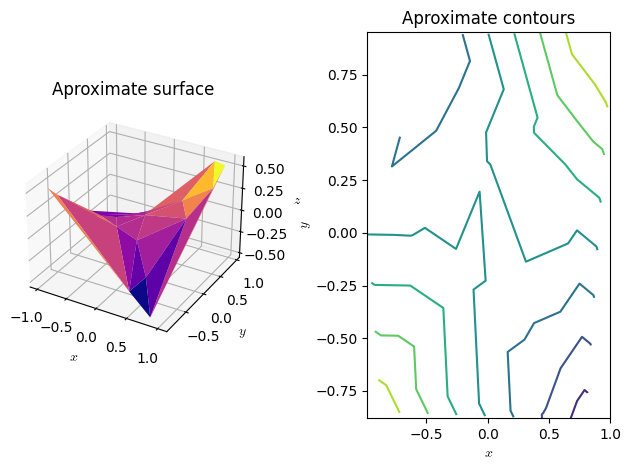

In [121]:
# contour and plot_contour, only work with highly structured data where the x, y, and z components are arranged into grids.
# Unfortunately, real-life data is rarely so structured. In this case, you need to perform some kind of interpolation 
# between known points to approximate the value on a uniform grid, which can then be plotted.
x = np.array([ 0.19, -0.82, 0.8 , 0.95, 0.46, 0.71, 
     -0.86, -0.55,   0.75,-0.98, 0.55, -0.17, -0.89,
         -0.4 , 0.48, -0.09, 1., -0.03, -0.87, -0.43])
y = np.array([-0.25, -0.71, -0.88, 0.55, -0.88, 0.23, 
      0.18,-0.06, 0.95, 0.04, -0.59, -0.21, 0.14, 0.94, 
          0.51, 0.47, 0.79, 0.33, -0.85, 0.19])
z = np.array([-0.04, 0.44, -0.53, 0.4, -0.31, 0.13, 
      -0.12, 0.03, 0.53, -0.03, -0.25, 0.03, -0.1 , 
          -0.29, 0.19, -0.03, 0.58, -0.01, 0.55, -0.06])
# Create figure, add surface and countour plot
# surface plot
fig = plt.figure(tight_layout=True)  # force new figure
ax1 = fig.add_subplot(1, 2, 1, projection="3d")  # 3d axes
ax1.plot_trisurf(x, y, z, cmap="plasma")
ax1.set_xlabel("$x$", usetex=True)
ax1.set_ylabel("$y$", usetex=True)
ax1.set_zlabel("$z$", usetex=True)
ax1.set_title("Aproximate surface")
# contour plot
ax2 = fig.add_subplot(1, 2, 2)  # 2d axes
ax2.tricontour(x, y, z)
ax2.set_xlabel("$x$", usetex=True)
ax2.set_ylabel("$y$", usetex=True)
ax2.set_title("Aproximate contours")


### Customizing 3D plots

Text(0.5, 0, '$z$')

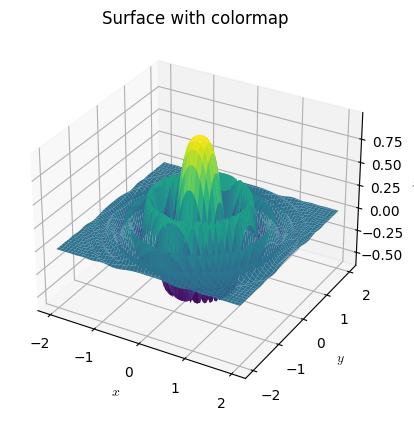

In [167]:
# f(x, y) = cos(2*pi*(x^2+y^2)) * e^-(x^2+y^2)
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(X, Y)
t = x**2 + y**2
z = np.cos(2*np.pi*t)*np.exp(-t)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# surface
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_title('Surface with colormap')
ax.set_xlabel("$x$", usetex=True)
ax.set_ylabel("$y$", usetex=True)
ax.set_zlabel("$z$", usetex=True)


Text(0.5, 1.0, 'Contour plot with colormap set')

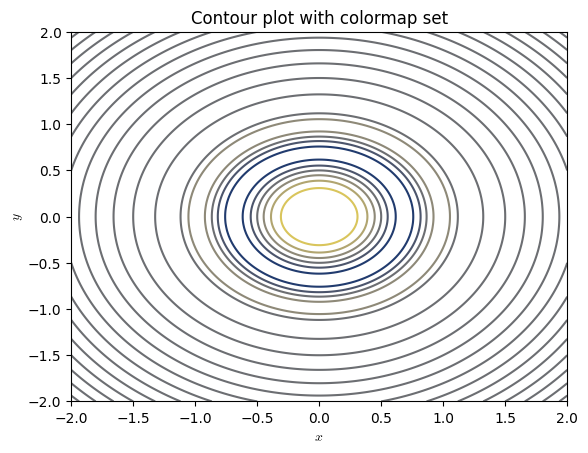

In [164]:
# contour
fig = plt.figure()
plt.contour(x, y, z, cmap='cividis')
plt.xlabel('$x$', usetex=True)
plt.ylabel('$y$', usetex=True)
plt.title('Contour plot with colormap set')

### Advanced (LightSource)

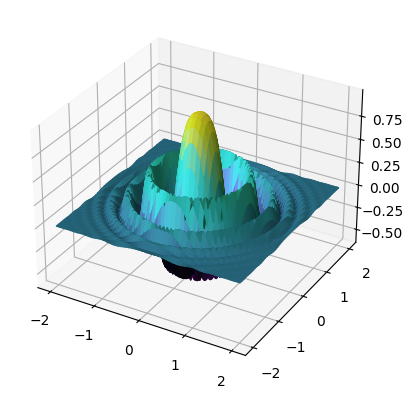

In [168]:
from matplotlib.colors import LightSource
light_source = LightSource(0, 45)  # angles of lightsource
cmap = plt.get_cmap("viridis")
vals = light_source.shade(z, cmap)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z, facecolors=vals)